In [15]:
lat, lon = (38, -3)

In [16]:
import pyproj

wgs = pyproj.CRS('EPSG:4326')
utm = pyproj.CRS('EPSG:25830')

transformer = pyproj.Transformer.from_crs('epsg:4326', 'epsg:25830')
x_utm, y_utm = transformer.transform(lat, lon)

# Mapa topográfico
### Descarga del mapa topográfico a través del servidor WMS del IGN

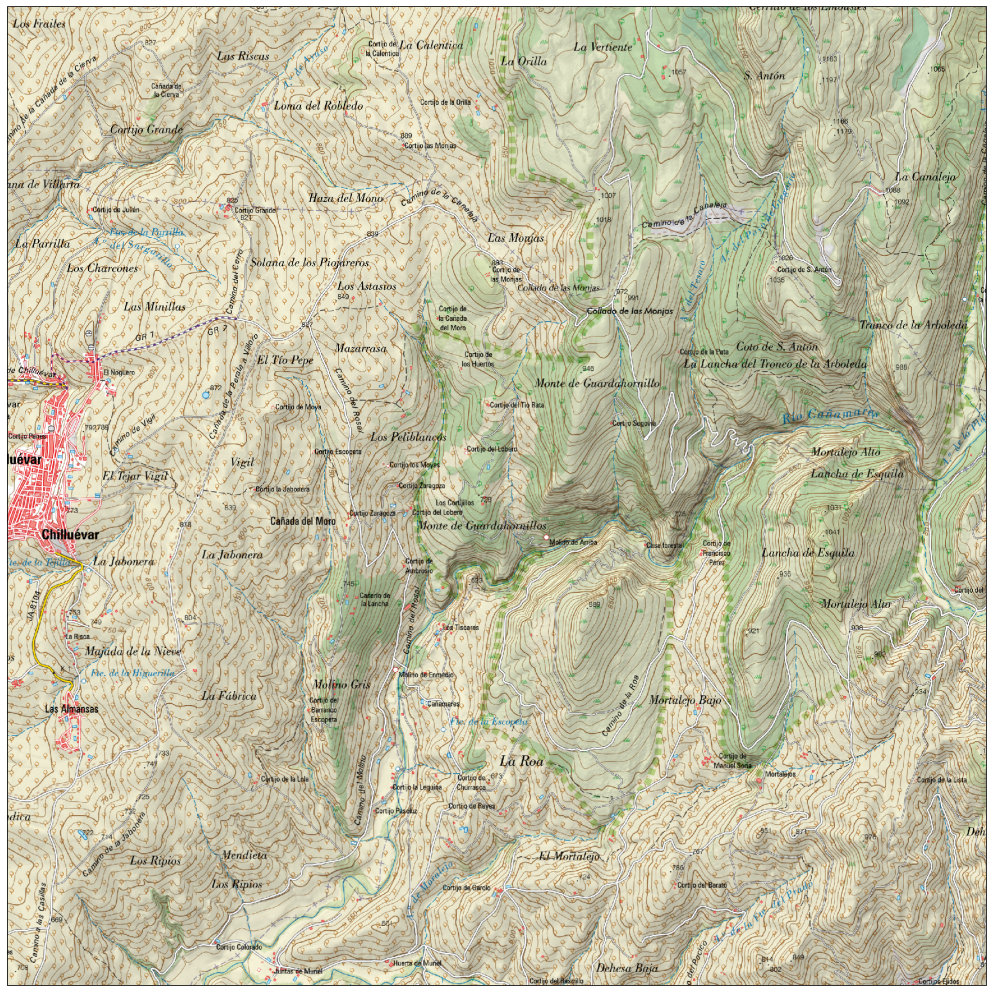

In [9]:
from cartopy import crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import owslib

proj = ccrs.epsg('25830')

fig = plt.figure(figsize=(24,18))
ax = plt.axes(projection=proj)

buffer = 3000

ax.set_extent([x_utm - buffer, x_utm + buffer, y_utm - buffer, y_utm + buffer], crs=proj)

ax.add_wms(wms='https://www.ign.es/wms-inspire/mapa-raster', layers=['mtn_rasterizado'])

plt.show()

# Red de información agroclimática de Andalucia
### Descarga de los datos meteorológicos de la estación más cercana

In [7]:
import requests
import json
import pandas
import geopandas
from shapely.geometry import Point
import datetime

r = requests.get('http://www.juntadeandalucia.es/agriculturaypesca/ifapa/riaws/estaciones')
df = pandas.read_json(r.text)

gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df['xutm'], df['yutm']), crs="EPSG:25830")
display(gdf)

,provincia,codigoEstacion,nombre,bajoplastico,activa,visible,longitud,latitud,altitud,xutm,yutm,huso,geometry
0,"{'id': 14, 'nombre': 'Córdoba'}",2,Adamuz,False,True,True,042643000W,375951000N,145,373099.0,4206530.0,30,POINT (373099.000 4206530.000)
1,"{'id': 4, 'nombre': 'Almería'}",10,Adra,False,True,True,025932000W,364448000N,2,500683.0,4066780.0,30,POINT (500683.000 4066780.000)
2,"{'id': 23, 'nombre': 'Jaén'}",6,Alcaudete,False,True,True,040442000W,373438000N,640,404780.0,4159460.0,30,POINT (404780.000 4159460.000)
3,"{'id': 4, 'nombre': 'Almería'}",2,Almería,False,True,True,022408000W,365007000N,5,553282.0,4076780.0,30,POINT (553282.000 4076780.000)
4,"{'id': 21, 'nombre': 'Huelva'}",10,Almonte,False,True,True,062835000W,370853000N,13,191221.0,4116990.0,30,POINT (191221.000 4116990.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,"{'id': 41, 'nombre': 'Sevilla'}",14,Villanueva del Río y Minas,False,False,True,054102000W,373646000N,38,263096.0,4166270.0,30,POINT (263096.000 4166270.000)
118,"{'id': 41, 'nombre': 'Sevilla'}",22,Villanueva del Río y Minas,False,True,True,054119000W,373533000N,31,262609.0,4164000.0,30,POINT (262609.000 4164000.000)
119,"{'id': 4, 'nombre': 'Almería'}",6,Virgen de Fátima-Cuevas de Almanzora,False,True,True,014613000W,372320000N,173,608847.0,4138750.0,30,POINT (608847.000 4138750.000)
120,"{'id': 29, 'nombre': 'Málaga'}",2,Vélez-Málaga,False,True,True,040753000W,364745000N,33,399039.0,4072850.0,30,POINT (399039.000 4072850.000)


In [35]:
import math

n = int(input("Enter the number of points\n"))
line_points = []
for i in range(n):
    x, y = input("Enter the coordinate x,y \n").split(',')
    coordinates = [int(x), int(y)]
    line_points.append(coordinates)

xp, yp = input("Enter the coordinate of center point P \n").split(',')
pt = [int(xp), int(yp)]
dist = []
c = 0

least_distance = 0
for i in range(n):
    xa = int(line_points[i][0])
    ya = int(pt[0])
    xb = int(line_points[i][1])
    yb = int(pt[1])
    # Euclidean distance formula
    distance = math.sqrt(((xa - ya)**2) + ((xb - yb)**2))
    dist.append(distance)
    print(distance)
    # Finding the least distance value
    if distance <= least_distance:
        least_distance = distance

# Finding the points with least distance
c_list = list()
for i in range(len(dist)):
    if dist[i] == least_distance:
        c_list.append(line_points[i])

print("Points which are closer to the point P : ", tuple(c_list))

Enter the number of points
 3
Enter the coordinate x,y 
 0,1
Enter the coordinate x,y 
 2,3
Enter the coordinate x,y 
 3,4
Enter the coordinate of center point P 
 2,2


2.23606797749979
1.0
2.23606797749979
Points which are closer to the point P :  ()


In [37]:
import pygeos
e = [0,1]

id_provincia = gdf.iloc[e[[1]]['provincia'].iloc[0]['id']
id_estacion = gdf.iloc[e[1]]['codigoEstacion'].iloc[0]
display(gdf.iloc[e[1]])
hoy = datetime.datetime.now()
ini = datetime.datetime(hoy - datetime.timedelta(days=1)).strftime('%Y-%m-%d')
fin = datetime.datetime(hoy - datetime.timedelta(days=16)).strftime('%Y-%m-%d')
# ini = ayer.strftime('%Y-%m-%d')
# fin = dia.strftime('%Y-%m-%d')
r = requests.get('http://www.juntadeandalucia.es/agriculturaypesca/ifapa/riaws/datosdiarios/{}/{}/{}/{}/true'.format(id_provincia, id_estacion, fin, ini))
datos = pandas.read_json(r.text)
display(datos)

AttributeError: 'Point' object has no attribute '_ptr'

In [ ]:
fechas = datos['fecha'].map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%d-%m'))

fig = plt.figure(figsize=(12,3))
plt.plot(fechas, datos['tempMax'], 'maroon', datos['tempMin'], 'indianred', datos['tempMedia'], 'lightcoral')
plt.axis([0,15, 0,30])
plt.show()
plt.close()

fig = plt.figure(figsize=(12,3))
plt.plot(fechas, datos['humedadMax'], 'darkblue', datos['humedadMin'], 'mediumblue', datos['humedadMedia'], 'blue')
plt.axis([0,15, 0,100])
plt.show()
plt.close()